# A Neural Network Classification model to predict lithologies from geophysical logs of Kansas Oil field, USA

**Geophysical logs used**
1. Natural Gamma (API)
2. Neutron Porosity (%)
3. Density Porosity (%)
4. Photo electric cross-section (in barns/sec)

**Most common Lithologies present in the area**
1. Halite
2. Gypsum
3. Dolomite
4. Dolomitic Limestone
6. Cherty Dolomitic Limestone
7. Cherty Dolomite
8. Limestone
9. Cherty Limestone
10. Chert
11. Shale
12. Sand Stone
13. Ironstone
14. Coal

**Nature of Reservior**
Carbonate reservior


In [1]:
import geopandas as gpd

In [2]:
import folium
m=folium.Map([38.7128,-98.0060],zoom_start=5)
display(m)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
data = pd.read_csv('DataSet.csv')

In [5]:
data.head()

,GR,NPHI,DPHI,PEF,PICK,TRUE
0,18.4445,0.1263,0.0973,2.5341,7,7
1,18.4814,0.1138,0.0882,2.5683,7,7
2,17.9632,0.1100,0.0890,2.5396,7,7
3,16.0150,0.1213,0.1170,2.3682,7,7
4,14.6361,0.1112,0.1520,2.1106,10,10


In [6]:
data1 = data[['GR','NPHI', 'DPHI', 'PEF', 'TRUE']]

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GR      5000 non-null   float64
 1   NPHI    5000 non-null   float64
 2   DPHI    5000 non-null   float64
 3   PEF     5000 non-null   float64
 4   TRUE    5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 195.4 KB


In [8]:
import csv
input_file = csv.DictReader(open("Lithology.csv"))

In [9]:
import csv
with open('Lithology.csv') as f:
    d = dict(filter(None, csv.reader(f)))

print(d)

{'1': 'Unkown', '2': 'Halite', '3': 'Gypsum', '4': 'Dolomite', '5': 'Dolomitic Limestone', '6': 'Cherty Dolomitic Limestone', '7': 'Cherty Dolomite', '8': 'Limestone', '9': 'Cherty Limestone', '10': 'Chert', '11': 'Shale', '12': 'Sand Stone', '13': 'Ironstone', '14': 'Coal'}


In [10]:
type(d)

dict

In [11]:
print(d)

{'1': 'Unkown', '2': 'Halite', '3': 'Gypsum', '4': 'Dolomite', '5': 'Dolomitic Limestone', '6': 'Cherty Dolomitic Limestone', '7': 'Cherty Dolomite', '8': 'Limestone', '9': 'Cherty Limestone', '10': 'Chert', '11': 'Shale', '12': 'Sand Stone', '13': 'Ironstone', '14': 'Coal'}


In [12]:
data1["TRUE"] = data1["TRUE"].astype(str)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data1

,GR,NPHI,DPHI,PEF,TRUE
0,18.4445,0.1263,0.0973,2.5341,7
1,18.4814,0.1138,0.0882,2.5683,7
2,17.9632,0.1100,0.0890,2.5396,7
3,16.0150,0.1213,0.1170,2.3682,7
4,14.6361,0.1112,0.1520,2.1106,10
...,...,...,...,...,...
4995,13.0368,0.1183,0.0607,3.8356,5
4996,15.1915,0.1109,0.0523,3.8810,5
4997,17.0435,0.1029,0.0466,3.8576,5
4998,16.7579,0.1225,0.0658,3.8497,5


In [14]:
data1['TRUE']

0        7
1        7
2        7
3        7
4       10
        ..
4995     5
4996     5
4997     5
4998     5
4999     5
Name: TRUE, Length: 5000, dtype: object

In [15]:
data1.TRUE = [d[item] for item in data1.TRUE] 

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
data1

,GR,NPHI,DPHI,PEF,TRUE
0,18.4445,0.1263,0.0973,2.5341,Cherty Dolomite
1,18.4814,0.1138,0.0882,2.5683,Cherty Dolomite
2,17.9632,0.1100,0.0890,2.5396,Cherty Dolomite
3,16.0150,0.1213,0.1170,2.3682,Cherty Dolomite
4,14.6361,0.1112,0.1520,2.1106,Chert
...,...,...,...,...,...
4995,13.0368,0.1183,0.0607,3.8356,Dolomitic Limestone
4996,15.1915,0.1109,0.0523,3.8810,Dolomitic Limestone
4997,17.0435,0.1029,0.0466,3.8576,Dolomitic Limestone
4998,16.7579,0.1225,0.0658,3.8497,Dolomitic Limestone


# Data Visualization

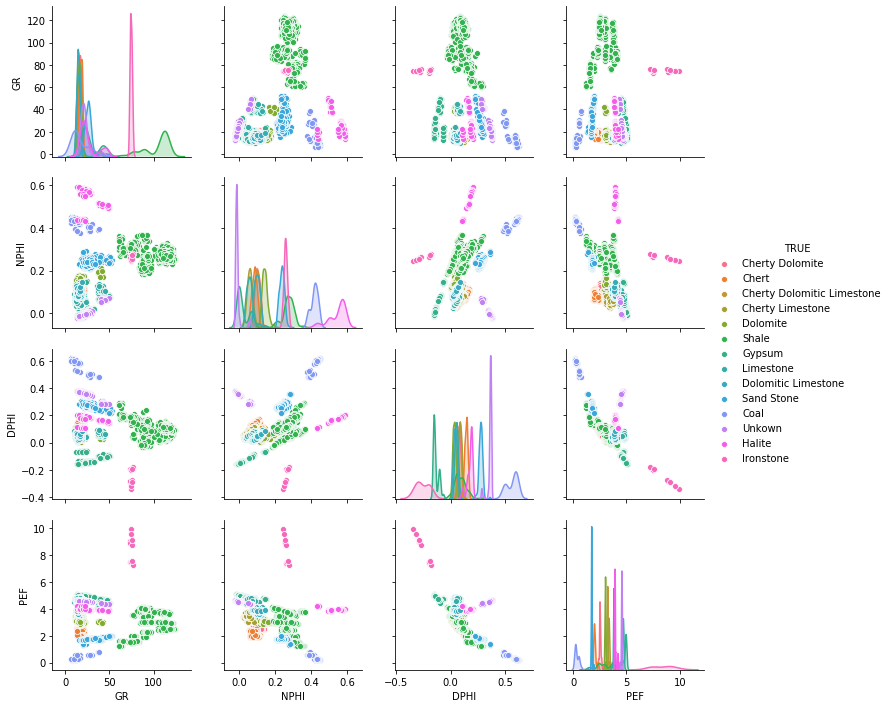

In [17]:
sns.pairplot(data1, hue="TRUE")

# Natural Gamma Value in different type of Lithology

In [33]:
dd1=data1[data1["TRUE"].isin(['Dolomite','Limestone','Sand Stone'])]
dd1

,GR,NPHI,DPHI,PEF,TRUE
104,14.7541,0.1298,0.0438,2.9257,Dolomite
105,15.9558,0.1606,0.0589,2.9954,Dolomite
106,15.9973,0.1650,0.0600,2.9572,Dolomite
107,16.7282,0.1657,0.0646,2.9598,Dolomite
108,15.3756,0.1670,0.0652,2.9600,Dolomite
...,...,...,...,...,...
4967,13.1443,0.0476,0.0475,4.7253,Limestone
4968,11.8830,0.0584,0.0571,4.7876,Limestone
4969,13.8328,0.0757,0.0741,4.8097,Limestone
4970,17.1072,0.0652,0.0576,4.7773,Limestone


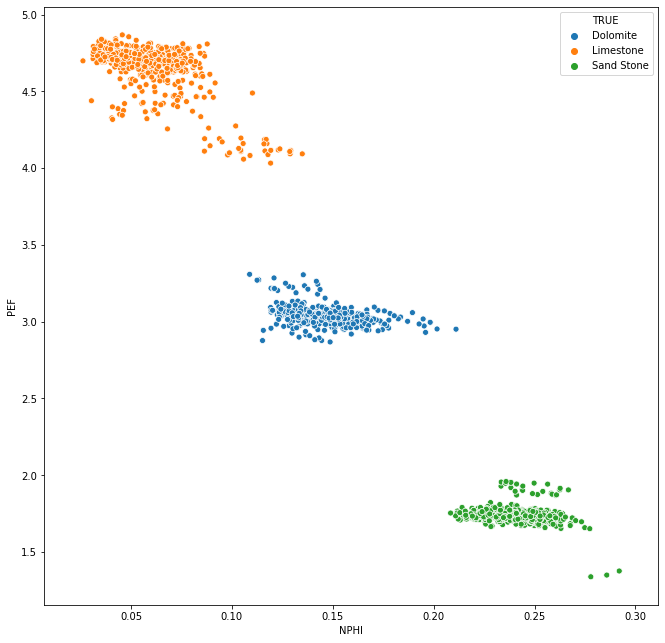

In [36]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11, 11)
sns.scatterplot(x=dd1['NPHI'],y=dd1['PEF'],hue=dd1['TRUE'])

# Cross-plot neutron porosity vs density porosity

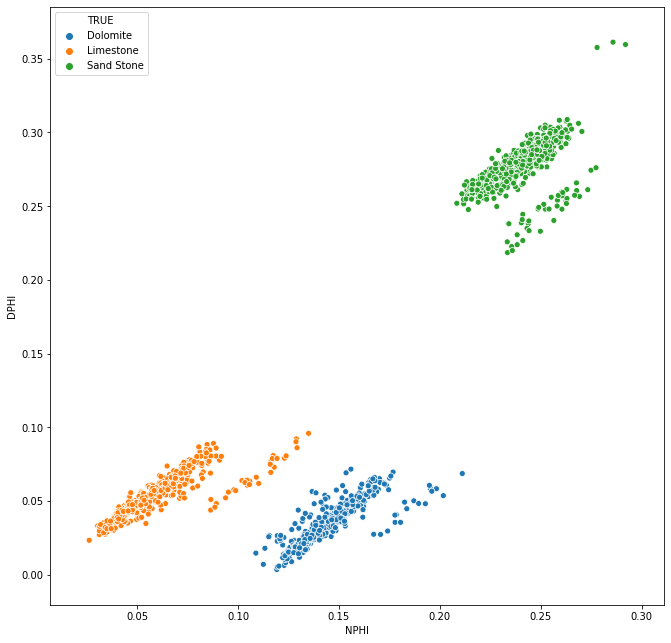

In [35]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11, 11)
sns.scatterplot(x=dd1['NPHI'],y=dd1['DPHI'],hue=dd1['TRUE'])

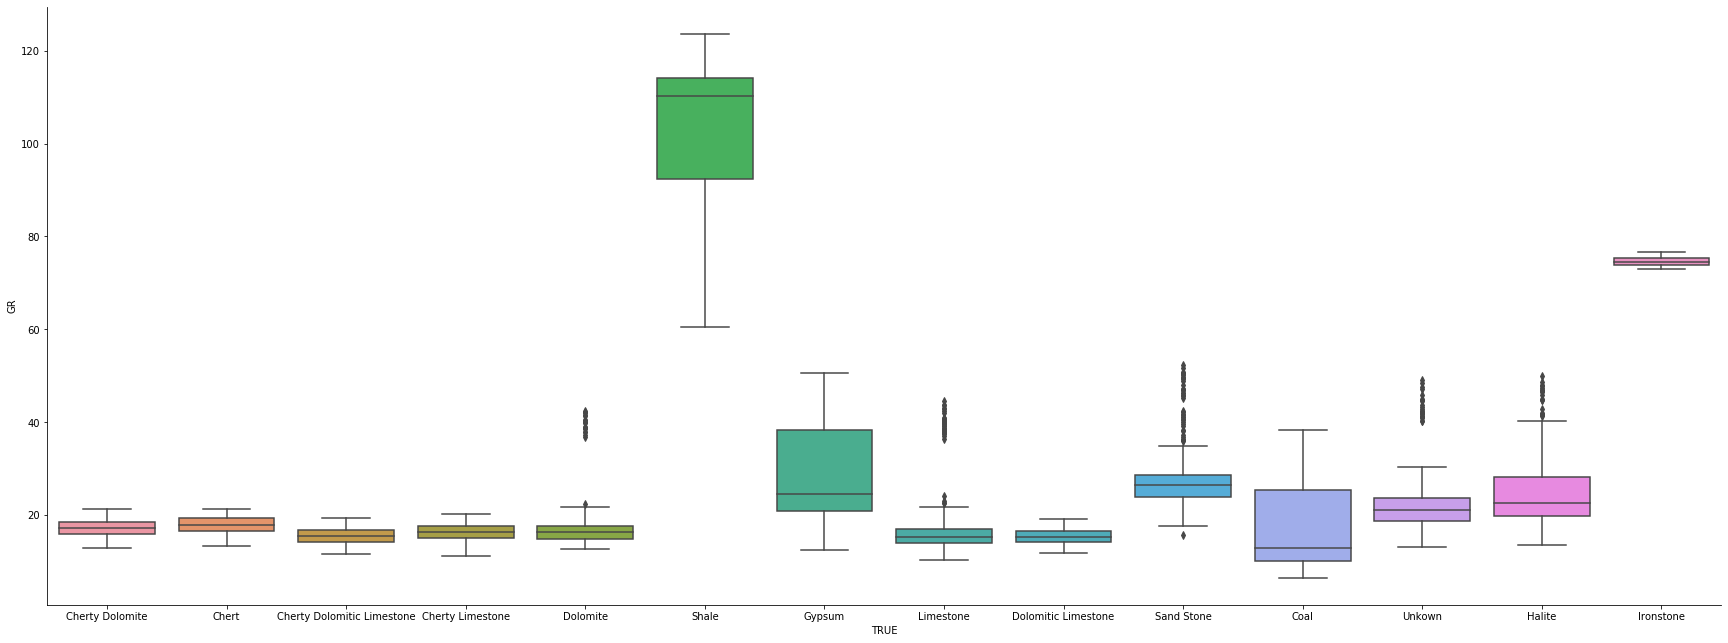

In [18]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 11)
sns.boxplot(x=data1["TRUE"], y=data1["GR"], ax=ax)    
sns.despine()
fig.savefig('Gamma.png')

# Neutron Posoristy in various Lithologies

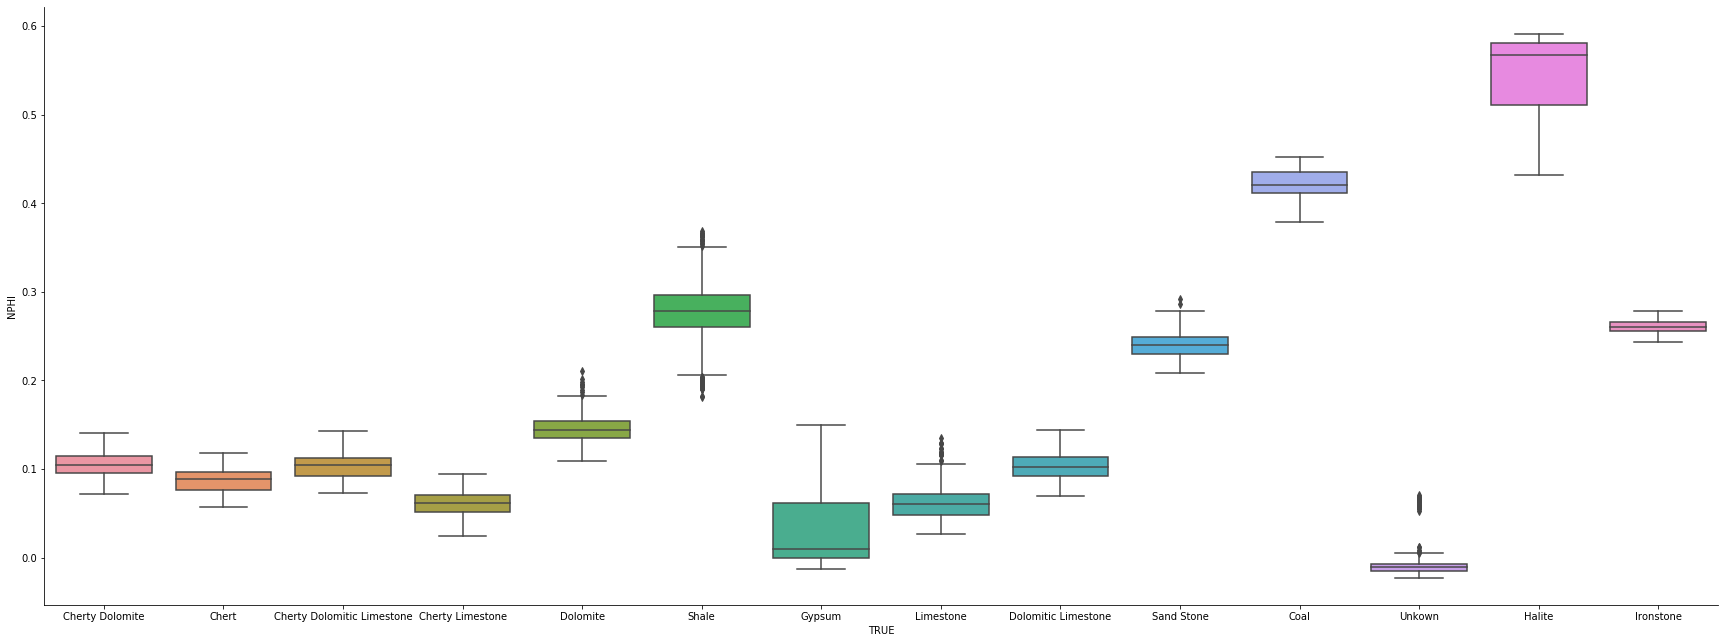

In [19]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 11)
sns.boxplot(x=data1["TRUE"], y=data1["NPHI"], ax=ax)    
sns.despine()
fig.savefig('Neutron.png')

# Density porosity in various lithologies

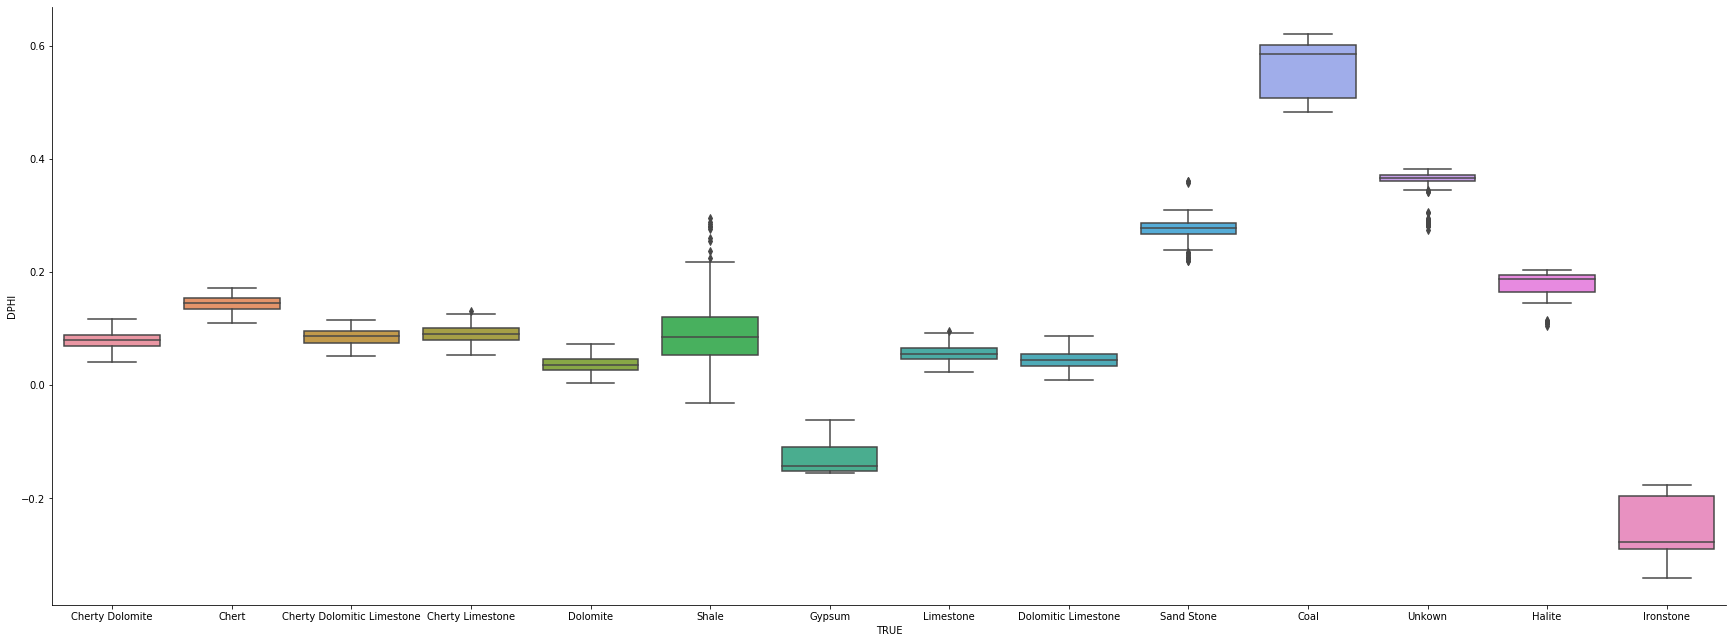

In [20]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 11)
sns.boxplot(x=data1["TRUE"], y=data1["DPHI"], ax=ax)    
sns.despine()
fig.savefig('Density.png')

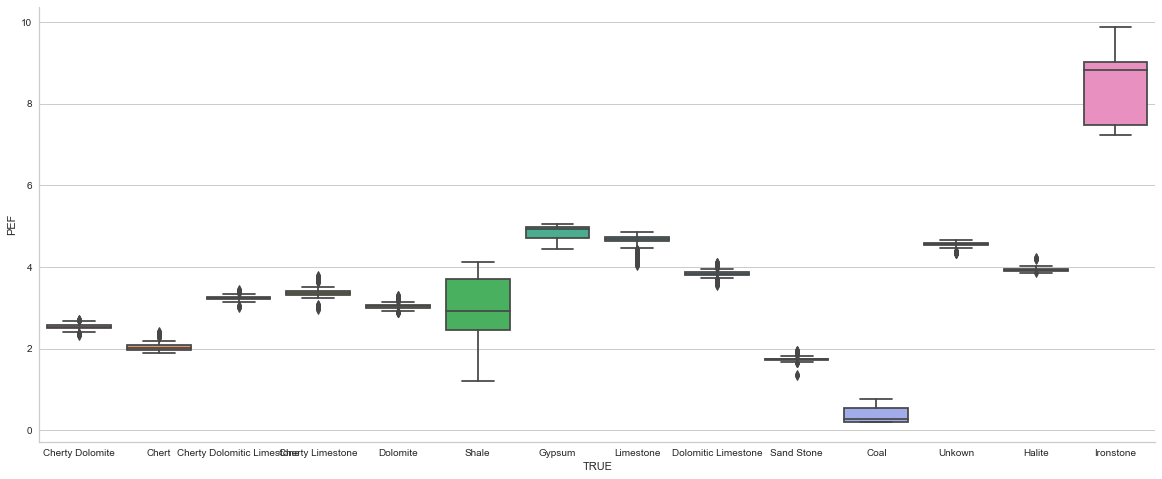

In [208]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
sns.boxplot(x=data1["TRUE"], y=data1["PEF"], ax=ax)    
sns.despine()
fig.savefig('PEF.png')

In [209]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1["TRUE"]  = le.fit_transform(data1['TRUE'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.drop(['TRUE'], axis=1), 
                                                    data1['TRUE'], train_size=0.7, random_state=122)

In [211]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [212]:
print(X_train_minmax.shape)
print(X_test_minmax.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 4)
(1500, 4)
(3500,)
(1500,)


In [213]:
import keras.utils as ut
dummy_y_train = ut.to_categorical(y_train)
dummy_y_test = ut.to_categorical(y_test)

In [214]:
dummy_y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [215]:
import tensorflow as tf

In [216]:
from tensorflow import keras
from tensorflow.keras import layers

In [217]:
model = keras.Sequential()
model.add(layers.Dense(8, input_dim=4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

In [218]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 14)                70        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [219]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'accuracy'])


In [220]:
history = model.fit(X_train_minmax, dummy_y_train, epochs=50, batch_size=10, validation_data=(X_test_minmax, dummy_y_test))

Train on 3500 samples, validate on 1500 samples
Epoch 1/50
3500/3500 [==============================] - 4s 1ms/sample - loss: 2.5715 - accuracy: 0.2500 - val_loss: 2.5173 - val_accuracy: 0.2333
Epoch 2/50
3500/3500 [==============================] - 2s 535us/sample - loss: 2.4406 - accuracy: 0.2531 - val_loss: 2.2616 - val_accuracy: 0.2333
Epoch 3/50
3500/3500 [==============================] - 2s 431us/sample - loss: 1.8967 - accuracy: 0.3194 - val_loss: 1.6563 - val_accuracy: 0.3633
Epoch 4/50
3500/3500 [==============================] - 2s 441us/sample - loss: 1.4820 - accuracy: 0.5043 - val_loss: 1.3638 - val_accuracy: 0.6153
Epoch 5/50
3500/3500 [==============================] - 2s 437us/sample - loss: 1.2423 - accuracy: 0.6354 - val_loss: 1.1499 - val_accuracy: 0.7073
Epoch 6/50
3500/3500 [==============================] - 1s 396us/sample - loss: 1.0625 - accuracy: 0.7197 - val_loss: 0.9961 - val_accuracy: 0.7173
Epoch 7/50
3500/3500 [==============================] - 1s 357us/s

In [226]:
y_pred = model.predict(X_test)

In [222]:
y_p = np.argmax(y_pred, axis=-1)
y_p.max()

12

In [223]:
from yellowbrick.classifier import ConfusionMatrix

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

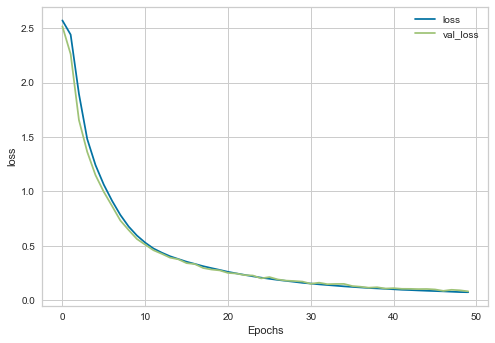

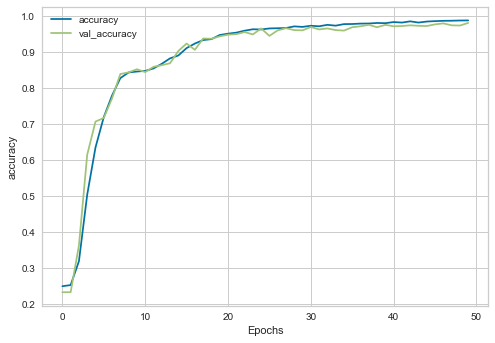

In [225]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")
plot_graphs(history, "accuracy")